## Apriori algorithm

In [102]:
# import the needed libraries 

import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


!pip install squarify
import squarify
import seaborn as sns
import itertools
plt.style.use('fivethirtyeight')


# for market basket analysis
!pip install mlxtend --upgrade --no-deps
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

In [103]:
# reading the dataset

data = pd.read_csv('/content/Market_Basket_Optimisation.csv', header = None)


In [104]:
#shape of the data
data.shape

(7501, 20)

In [105]:
# head of the data (1st 5 values)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
# tail of the data (lat 5 values)
data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7500,eggs,frozen smoothie,yogurt cake,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
#description of data
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,frozen smoothie,frozen smoothie,protein bar,cereals,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


In [108]:
# figuring out the no. of null values
data.isnull().sum()

0        0
1     1754
2     3112
3     4156
4     4972
5     5637
6     6132
7     6520
8     6847
9     7106
10    7245
11    7347
12    7414
13    7454
14    7476
15    7493
16    7497
17    7497
18    7498
19    7500
dtype: int64

In [109]:
data.dtypes

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
dtype: object

In [110]:
trans=[]
for i in range(0,7501):
    trans.append([str(data.values[i,j]) for j in range(0,20)])

trans=np.array(trans)

print(trans.shape)

(7501, 20)


In [111]:
t=TransactionEncoder()
data=t.fit_transform(trans)
data=pd.DataFrame(data,columns=t.columns_,dtype=int)

data.shape

(7501, 121)

In [112]:
data.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,eggs,energy bar,energy drink,...,oil,olive oil,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


[Text(0, 0, 'nan'),
 Text(0, 0, 'mineral water'),
 Text(0, 0, 'eggs'),
 Text(0, 0, 'spaghetti'),
 Text(0, 0, 'french fries'),
 Text(0, 0, 'chocolate'),
 Text(0, 0, 'green tea'),
 Text(0, 0, 'milk'),
 Text(0, 0, 'ground beef'),
 Text(0, 0, 'frozen vegetables'),
 Text(0, 0, 'pancakes'),
 Text(0, 0, 'burgers'),
 Text(0, 0, 'cake'),
 Text(0, 0, 'cookies'),
 Text(0, 0, 'escalope'),
 Text(0, 0, 'low fat yogurt'),
 Text(0, 0, 'shrimp'),
 Text(0, 0, 'tomatoes'),
 Text(0, 0, 'olive oil'),
 Text(0, 0, 'frozen smoothie')]

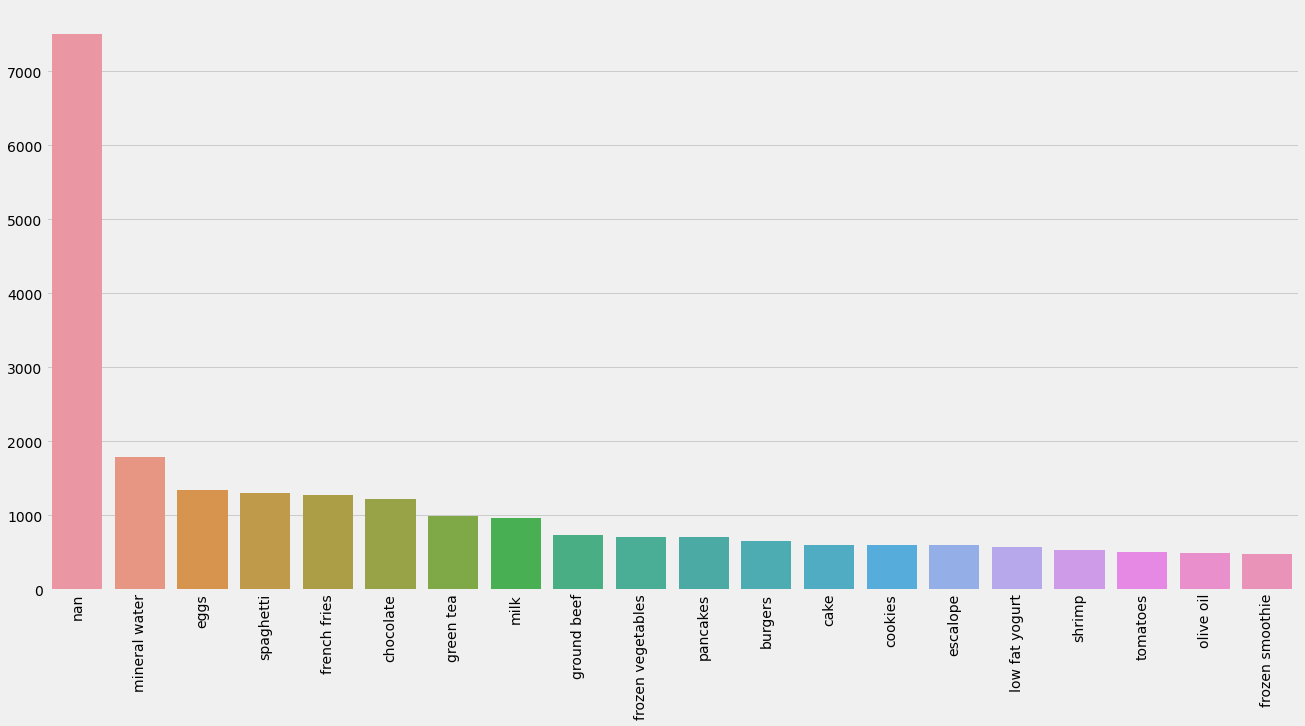

In [114]:
##we consider the top 20 items purchased frequently
r=data.sum(axis=0).sort_values(ascending=False)[:20]
#altering the figsize
plt.figure(figsize=(20,10))
s=sns.barplot(x=r.index,y=r.values)
s.set_xticklabels(s.get_xticklabels(), rotation=90)

(0.0, 100.0, 0.0, 100.0)

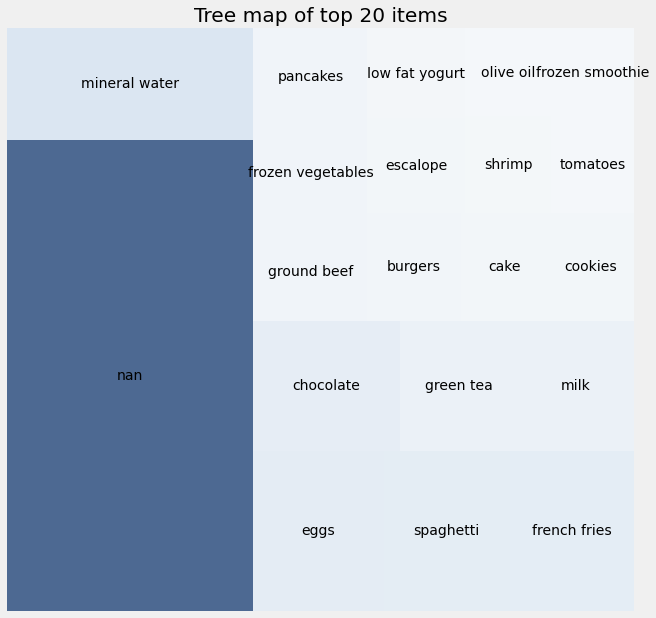

In [115]:

my_values=r.values
cmap = matplotlib.cm.Blues
mini=min(my_values)
maxi=max(my_values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]


#treemap of top 20 frequent items
plt.figure(figsize=(10,10))
squarify.plot(sizes=r.values, label=r.index, alpha=.7,color=colors)
plt.title("Tree map of top 20 items")
plt.axis('off')

We can find that mineral water is the most purchased item from the store, we may advice that mineral water must be always in the stock not only that mostly we can see from the above graph what 20 items are being frequently purchased.

We start working on apriori

In [116]:
#we return items and ietmsets with atleast 5% support:
freq_items=apriori(data,min_support=0.05,use_colnames=True)

In [117]:
freq_items

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)
5,0.051060,(cooking oil)
6,0.179709,(eggs)
7,0.079323,(escalope)
8,0.170911,(french fries)
9,0.063325,(frozen smoothie)


In [118]:
result = association_rules(freq_items,metric="lift",min_threshold=1.0)

In [119]:
result

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(nan),(burgers),0.999867,0.087188,0.087188,0.087200,1.000133,0.000012,1.000013
1,(burgers),(nan),0.087188,0.999867,0.087188,1.000000,1.000133,0.000012,inf
2,(nan),(cake),0.999867,0.081056,0.081056,0.081067,1.000133,0.000011,1.000012
3,(cake),(nan),0.081056,0.999867,0.081056,1.000000,1.000133,0.000011,inf
4,(chicken),(nan),0.059992,0.999867,0.059992,1.000000,1.000133,0.000008,inf
...,...,...,...,...,...,...,...,...,...
57,"(mineral water, nan)",(spaghetti),0.238235,0.174110,0.059725,0.250699,1.439890,0.018246,1.102215
58,"(spaghetti, nan)",(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
59,(mineral water),"(spaghetti, nan)",0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008
60,(spaghetti),"(mineral water, nan)",0.174110,0.238235,0.059725,0.343032,1.439890,0.018246,1.159517





## Selecting and Filtering the Results



In [120]:
frequent_itemsets = apriori(data, min_support = 0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.087188,(burgers),1
1,0.081056,(cake),1
2,0.059992,(chicken),1
3,0.163845,(chocolate),1
4,0.080389,(cookies),1
5,0.051060,(cooking oil),1
6,0.179709,(eggs),1
7,0.079323,(escalope),1
8,0.170911,(french fries),1
9,0.063325,(frozen smoothie),1


In [121]:
# getting the item sets with length = 1 and support more than 5%

frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.05) ]

,support,itemsets,length
0,0.087188,(burgers),1
1,0.081056,(cake),1
2,0.059992,(chicken),1
3,0.163845,(chocolate),1
4,0.080389,(cookies),1
5,0.051060,(cooking oil),1
6,0.179709,(eggs),1
7,0.079323,(escalope),1
8,0.170911,(french fries),1
9,0.063325,(frozen smoothie),1


In [122]:
# getting th item sets with length = 2 and support more than 5%

frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.05) ]

,support,itemsets,length
26,0.087188,"(nan, burgers)",2
27,0.081056,"(nan, cake)",2
28,0.059992,"(chicken, nan)",2
29,0.052660,"(mineral water, chocolate)",2
30,0.163845,"(chocolate, nan)",2
31,0.080389,"(cookies, nan)",2
32,0.051060,"(nan, cooking oil)",2
33,0.050927,"(mineral water, eggs)",2
34,0.179709,"(eggs, nan)",2
35,0.079323,"(nan, escalope)",2


In [123]:

frequent_itemsets = apriori(data, min_support=0.05,use_colnames=True)
frequent_itemsets = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
frequent_itemsets[['antecedents','antecedent support','consequents','consequent support','confidence']]

,antecedents,antecedent support,consequents,consequent support,confidence
0,(burgers),0.087188,(nan),0.999867,1.000000
1,(cake),0.081056,(nan),0.999867,1.000000
2,(chicken),0.059992,(nan),0.999867,1.000000
3,(mineral water),0.238368,(chocolate),0.163845,0.220917
4,(chocolate),0.163845,(mineral water),0.238368,0.321400
5,(chocolate),0.163845,(nan),0.999867,1.000000
6,(nan),0.999867,(chocolate),0.163845,0.163867
7,(cookies),0.080389,(nan),0.999867,1.000000
8,(cooking oil),0.051060,(nan),0.999867,1.000000
9,(mineral water),0.238368,(eggs),0.179709,0.213647


## FP-growth algorithm

In [124]:
frequent_itemset_elements  = fpgrowth(data, min_support = 0.05 ,use_colnames = True)

In [126]:
frequent_itemset_elements 

,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076523,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
5,0.063325,(frozen smoothie)
6,0.999867,(nan)
7,0.179709,(eggs)
8,0.087188,(burgers)
9,0.062525,(turkey)


In [127]:
frequent_itemset_elements = fpgrowth(data, min_support=0.05,use_colnames=True)
frequent_itemset_elements = association_rules(frequent_itemset_elements, metric="confidence", min_threshold=0.1)
frequent_itemset_elements[['antecedents','antecedent support','consequents','consequent support','confidence']]

,antecedents,antecedent support,consequents,consequent support,confidence
0,(mineral water),0.238368,(nan),0.999867,0.999441
1,(nan),0.999867,(mineral water),0.238368,0.238267
2,(green tea),0.132116,(nan),0.999867,0.998991
3,(nan),0.999867,(green tea),0.132116,0.132000
4,(low fat yogurt),0.076523,(nan),0.999867,0.998258
5,(shrimp),0.071457,(nan),0.999867,0.998134
6,(olive oil),0.065858,(nan),0.999867,0.997976
7,(frozen smoothie),0.063325,(nan),0.999867,0.997895
8,(eggs),0.179709,(nan),0.999867,1.000000
9,(nan),0.999867,(eggs),0.179709,0.179733


## Comparison between Apriori and FP-growth algorithm in terms of run time (taking into consideration the min_support threshold factor)

In [128]:
import time
l=[0.01,0.02]
t=[]
for i in l:
    t1=time.time()
    apriori(data,min_support=i,use_colnames=True)
    t2=time.time()
    t.append((t2-t1)*1000)

In [129]:
l=[0.01,0.02]
f=[]
for i in l:
    t1=time.time()
    fpgrowth(data,min_support=i,use_colnames=True)
    t2=time.time()
    f.append((t2-t1)*1000)

Text(0, 0.5, 'Run Time in ms')

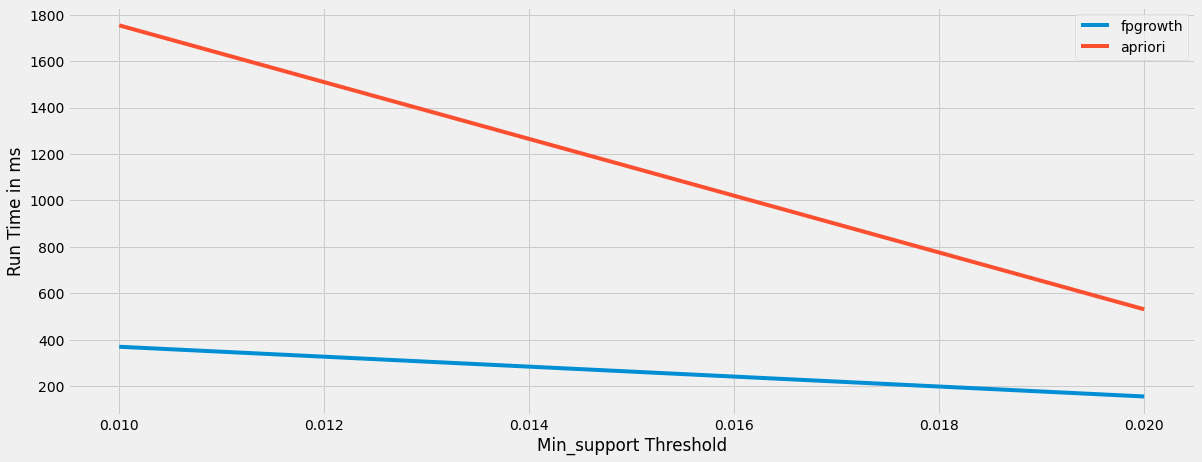

In [130]:
sns.lineplot(x=l,y=f,label="fpgrowth")
sns.lineplot(x=l,y=t,label="apriori")
plt.xlabel("Min_support Threshold")
plt.ylabel("Run Time in ms")